In [1]:
import sys
sys.path.append(r"C:\Users\mi\Google Диск\00_teaching 2019\ИТ при проектировании РиСО\it_RISO\лекция 3\ozvb_lib")

In [2]:
from ozvb import BallisticTermo

In [26]:
def get_opts(q=0.19, om_q=0.5 ,delta=400):
    omega = om_q * q *1000 # g
    W_kam = om_q * q / delta * 1e6  #cm^3
    print(f'omega = {omega}, W_kam={W_kam}')
    opts = {
    'powders': [
        {
            'omega': omega,      # масса навески пороха, г
            'dbname': r'4\7',   # имя пороха в БД
        },
    ],
    'init_cond': {
        'd':23,           # калибр, мм      
        'K_zar': 1.08,    # коэфф, учитывающий доп работы
        'q': q*1000,         # масса снаряда, г
        'W_kam': W_kam,   # объем каморы, см^3
        'F_0': 0.005,     # !! опционально !!. площадь поверхности каморы, м^2 
                          # (по-умолчанию будет 4*W_kam/d
        'sigma_T': 376,   # Постоянная коэффициента теплоотдачи, Дж*м/кг*К*с
        'T_stenki': 293,  # Температура стенки, К
        'p_f': 60e6,      # Давление форсирования, Па

        'p0': 5e6,        # Давление вспышки, Па
        'k_vospl': 1.22,  # Коэффициент адиабаты газов воспламенителя
        'f_vospl': 0.26,  # Cила воспламенителя, МДж/кг
        'T_vospl': 2427   # Температура газов воспламенителя, К
    },
    'integr_cond': {
        'method': 'rk4',
        't_max': 1e-2,
        'l_max': 10,
        'dt': 1e-6,
        'n_points_max': 7_000_000,
        'n_save_points': 1000
    }
    }
    return opts

In [28]:
opts = get_opts(q=0.19, om_q=0.5 ,delta=400)
bt = BallisticTermo(opts)

omega = 95.0, W_kam=237.5


In [24]:
res = bt.run()

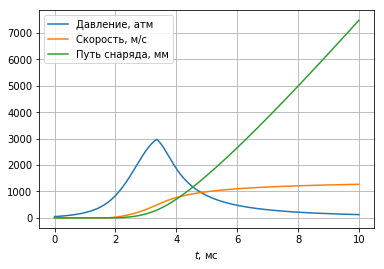

In [25]:
bt.plot()

In [17]:
bt.results['summary']

{'p_max': 87899985.58769585,
 'l_p_max': 0.014142392830559963,
 'V_d': 358.02260178668985,
 't_ball': 0.010000999999999104}